In [2]:
import os
import utils
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
params = utils.yaml_to_dict('config.yml')
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')
Fs, x = audioBasicIO.readAudioFile(sample_audio_path)

In [4]:
t=np.linspace(0,len(x)/Fs,len(x))

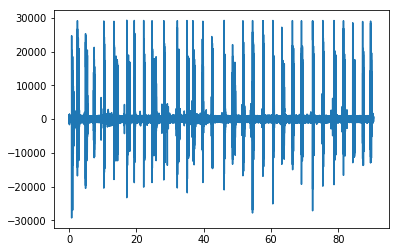

In [5]:
plt.plot(t,x)

In [6]:
print("FS:", Fs, "Output_size:", x.shape)

FS: 44100 Output_size: (3988970,)


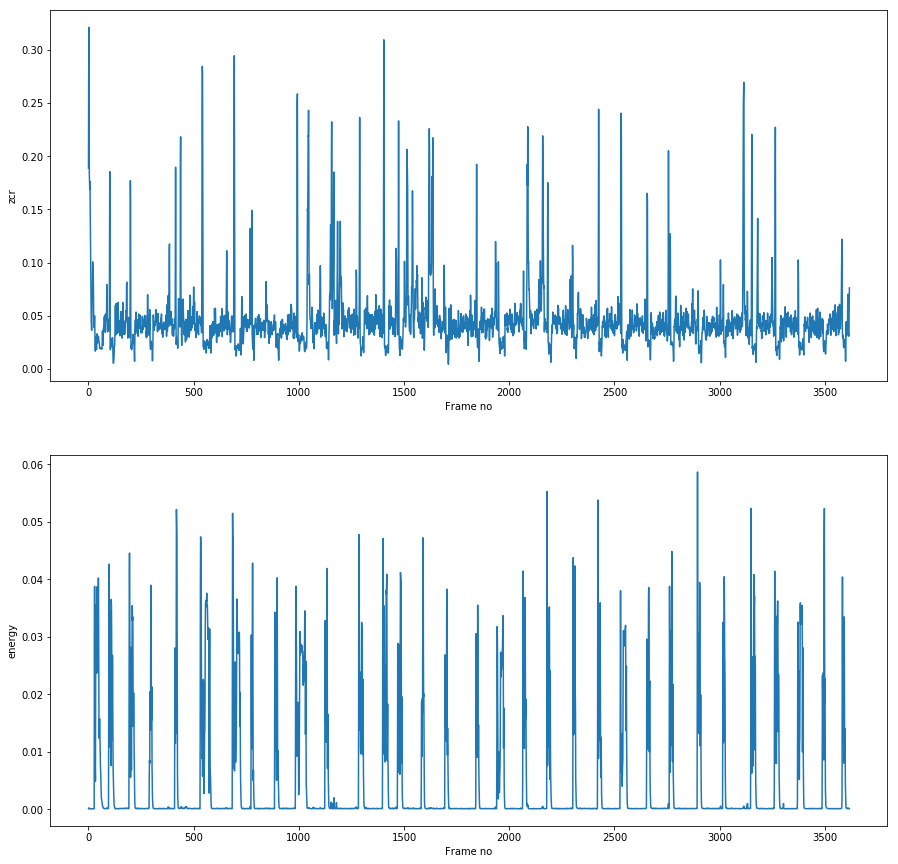

In [7]:
F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs);
fig, axis = plt.subplots(2,1,figsize=(15,15))
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]); 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [8]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')
[fs, x] = audioBasicIO.readAudioFile(sample_audio_path)
x = audioBasicIO.stereo2mono(x)
specgram, TimeAxis, FreqAxis = audioFeatureExtraction.stSpectogram(x[:200000], fs, round(fs * 0.02),
round(fs * 0.01), False)

In [9]:
import math
def MySpectrogram(x,ven,inc):
    Nven = math.floor(len(x)/inc) - 1
    Ventanas = np.zeros((Nven,ven))
    Spectrogram = np.zeros((Nven,512))
    ini = 0
    for i in range(Nven):
        Ventanas[i,:]=x[ini:ini+ven]
        ini += inc
        temp = 10*np.log(np.abs(np.fft.fft(Ventanas[i,:],n=1024))**2)
        Spectrogram[i,:]=temp[:512]
    return Spectrogram

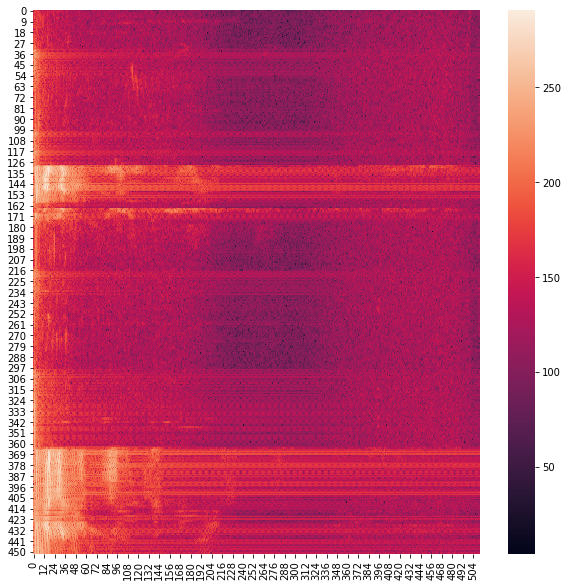

In [10]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Arranca','E-arranca_1.wav')
[fs, x] = audioBasicIO.readAudioFile(sample_audio_path)
x = audioBasicIO.stereo2mono(x)
Sp = MySpectrogram(x[:200000], round(fs * 0.02),round(fs * 0.01))
fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(Sp)

In [144]:
np.min(x)

-8841